In [ ]:
"""
This script compares and visualizes the text length distribution for each class in the datasets, original and augmented (trainval). 

"""


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Loading datasets

In [2]:
df_trainval = pd.read_csv('trainval.csv', index_col= 0)

augmented_trainval = pd.read_csv('augmented_trainval.csv', index_col=0)
df_aug_trainval = pd.concat([augmented_trainval, df_trainval[['text', 'snapshot_id', 'label']]], ignore_index=True)

augmented_trainval_quant = pd.read_csv('augmented_trainval_quant.csv', index_col=0)
df_aug_trainval_quant = pd.concat([augmented_trainval_quant, df_trainval[['text', 'snapshot_id', 'label']]], ignore_index=True)

augmented_trainval_quant_fs = pd.read_csv('augmented_trainval_quant_fs.csv', index_col=0)
df_aug_trainval_quant_fs = pd.concat([augmented_trainval_quant_fs, df_trainval[['text', 'snapshot_id', 'label']]], ignore_index=True)

augmented_trainval_quant_chat = pd.read_csv('augmented_trainval_quant_chat.csv', index_col=0)
df_aug_trainval_quant_chat = pd.concat([augmented_trainval_quant_chat, df_trainval[['text', 'snapshot_id', 'label']]], ignore_index=True)

In [3]:
def plot_text_length_distribution(df: pd.DataFrame) -> None:
    """
    Compare text length distribution for each class in the dataset.

    Parameters:
    - df: DataFrame containing 'text' and 'label' columns.

    Returns:
    None (plots the distribution and prints mean text length per class).
    """
    df['text_len'] = df['text'].apply(lambda x:len(x.split(' ')))

    visual_order = ["Financial Crime", "Cybercrime", "Drugs and Narcotics Trade", "Weapons Trade", "Violent Crime"]

    sns.boxplot(data=df, y='text_len', x='label', hue='label', palette='mako',
                medianprops=dict(color="white", alpha=0.7), order=visual_order)

    plt.xticks(rotation=30, ha='right')
    plt.title("Text Length Distribution", fontsize=14)
    plt.suptitle("")
    plt.ylim(0, 3000)
    plt.xlabel('Crime Category', fontsize=12)
    plt.ylabel('Text Length', fontsize=10)

    mean_text_lengths = df.groupby('label')['text_len'].mean()
    for crime_category, mean_length in mean_text_lengths.items():
        print(f"Mean text length for '{crime_category}': {mean_length:.2f}")


    plt.show()



Mean text length for 'Cybercrime': 626.03
Mean text length for 'Drugs and Narcotics Trade': 815.27
Mean text length for 'Financial Crime': 761.61
Mean text length for 'Violent Crime': 1173.48
Mean text length for 'Weapons Trade': 716.48


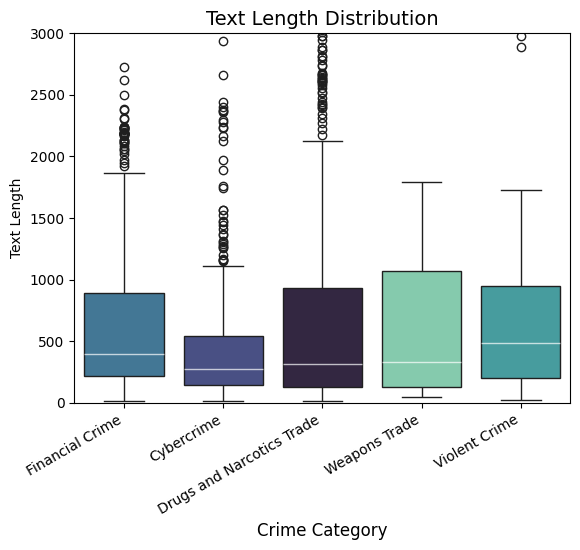

In [4]:
plot_text_length_distribution(df_trainval)

Mean text length for 'Cybercrime': 485.80
Mean text length for 'Drugs and Narcotics Trade': 485.20
Mean text length for 'Financial Crime': 761.61
Mean text length for 'Violent Crime': 169.94
Mean text length for 'Weapons Trade': 148.94


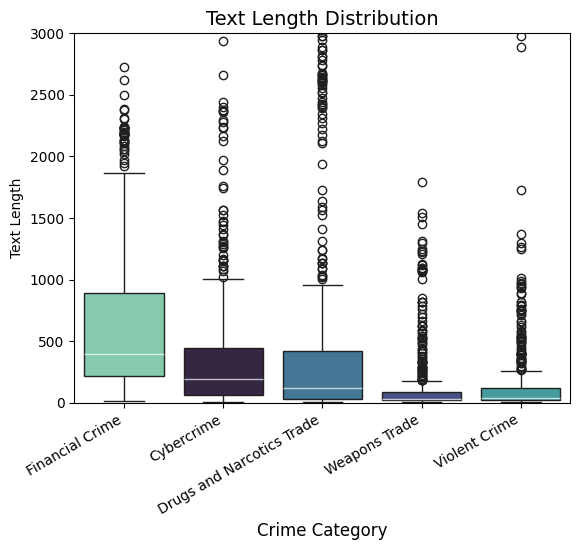

In [5]:
plot_text_length_distribution(df_aug_trainval)

Mean text length for 'Cybercrime': 487.23
Mean text length for 'Drugs and Narcotics Trade': 492.96
Mean text length for 'Financial Crime': 761.61
Mean text length for 'Violent Crime': 194.73
Mean text length for 'Weapons Trade': 207.22


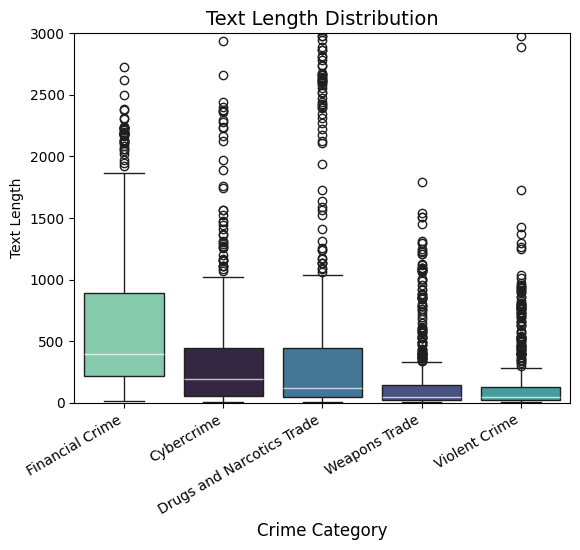

In [6]:
plot_text_length_distribution(df_aug_trainval_quant)

Mean text length for 'Cybercrime': 497.96
Mean text length for 'Drugs and Narcotics Trade': 502.10
Mean text length for 'Financial Crime': 761.61
Mean text length for 'Violent Crime': 189.96
Mean text length for 'Weapons Trade': 203.73


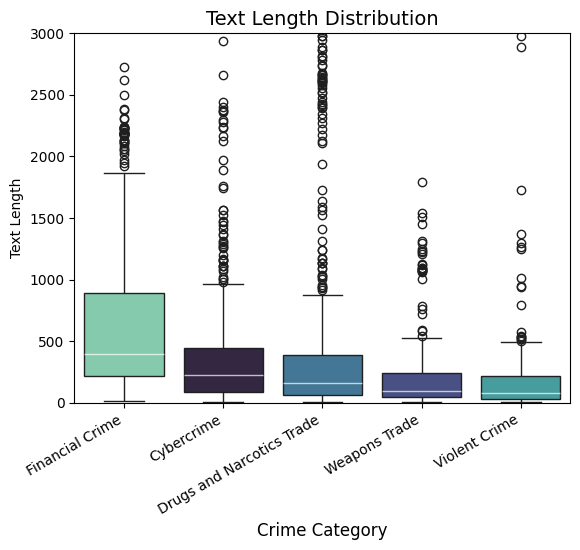

In [7]:
plot_text_length_distribution(df_aug_trainval_quant_fs)

Mean text length for 'Cybercrime': 476.85
Mean text length for 'Drugs and Narcotics Trade': 467.47
Mean text length for 'Financial Crime': 761.61
Mean text length for 'Violent Crime': 112.15
Mean text length for 'Weapons Trade': 126.54


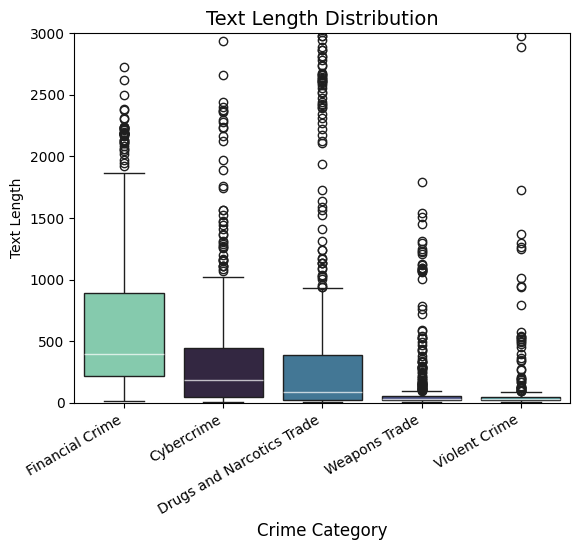

In [8]:
plot_text_length_distribution(df_aug_trainval_quant_chat)